In [1]:
!jt -t chesterish

In [2]:
# Import data analysis libraries
import pandas as pd
import numpy as np

# Import libraries for visualisation
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Show all columns
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

In [10]:
df = pd.read_csv('/Users/liamisaacs/Desktop/github repositories/personalwebsite/python_data_apps/leeague_ranked.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [14]:
df.shape

(9879, 40)

In [11]:
cols = df.columns
print(cols)

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')


In [12]:
# Seperate target variable from dataframe
y = df.blueWins

# Drop target and unnecessary features
drop_cols = ['gameId','blueWins']
x = df.drop(drop_cols, axis=1)

x.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Red Wins: 4949 (50.096%), Blue Wins: 4930(49.904%)


/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


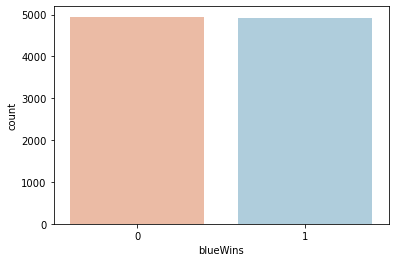

In [15]:
# Visualise blueWins using countplot
ax = sns.countplot(y, label='Count', palette='RdBu')
W, L = y.value_counts()

print('Red Wins: {} ({}%), Blue Wins: {}({}%)'.format(W,round(100*W/(W+L),3),L,round(100*L/(W+L),3)))

In [16]:
# Drop unnecessary features (same as blueFirstBlood, blueDeaths etc.)
drop_cols = ['redFirstBlood','redKills','redDeaths'
             ,'redGoldDiff','redExperienceDiff', 'blueCSPerMin',
            'blueGoldPerMin','redCSPerMin','redGoldPerMin']
x.drop(drop_cols, axis=1, inplace=True)
x.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,15,6,8,0,0,0,0,16567,6.8,17047,197,55
1,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,12,1,2,2,1,1,1,17620,6.8,17438,240,52
2,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,15,3,14,0,0,0,0,17285,6.8,17254,203,28
3,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,15,2,10,0,0,0,0,16478,7.0,17961,235,47
4,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,17,2,7,1,1,0,0,17404,7.0,18313,225,67


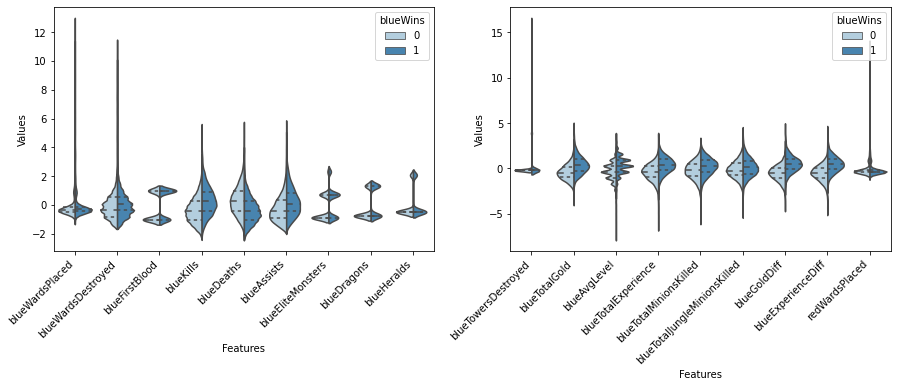

In [17]:
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 0:9]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

fig, ax = plt.subplots(1,2,figsize=(15,5))

# Create violin plot of features
#plt.figure(figsize=(8,5))
sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, split=True,
               inner='quart', ax=ax[0], palette='Blues')
fig.autofmt_xdate(rotation=45)

data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 9:18]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

# Create violin plot
#plt.figure(figsize=(8,5))
sns.violinplot(x='Features', y='Values', hue='blueWins', 
               data=data, split=True, inner='quart', ax=ax[1], palette='Blues')
fig.autofmt_xdate(rotation=45)

plt.show()

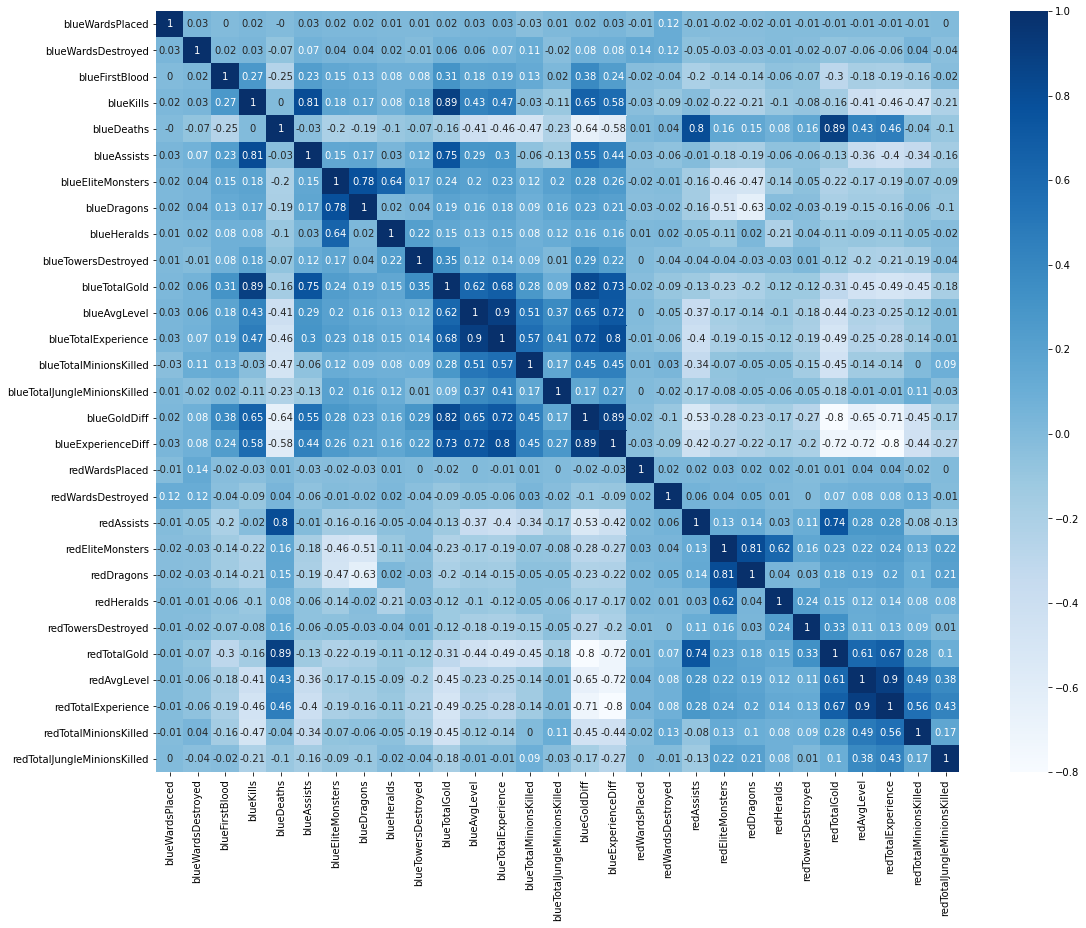

In [18]:
plt.figure(figsize=(18,14))
sns.heatmap(round(x.corr(),2), cmap='Blues', annot=True)
plt.show()

In [19]:
drop_cols = ['redAvgLevel','blueAvgLevel']
x.drop(drop_cols, axis=1, inplace=True)

/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


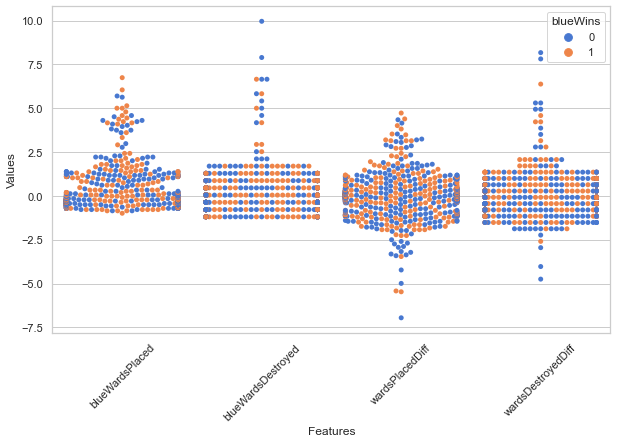

In [20]:
sns.set(style='whitegrid', palette='muted')

x['wardsPlacedDiff'] = x['blueWardsPlaced'] - x['redWardsPlaced']
x['wardsDestroyedDiff'] = x['blueWardsDestroyed'] - x['redWardsDestroyed']

data = x[['blueWardsPlaced','blueWardsDestroyed','wardsPlacedDiff','wardsDestroyedDiff']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10,6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

In [21]:
drop_cols = ['blueWardsPlaced','blueWardsDestroyed','wardsPlacedDiff',
            'wardsDestroyedDiff','redWardsPlaced','redWardsDestroyed']
x.drop(drop_cols, axis=1, inplace=True)

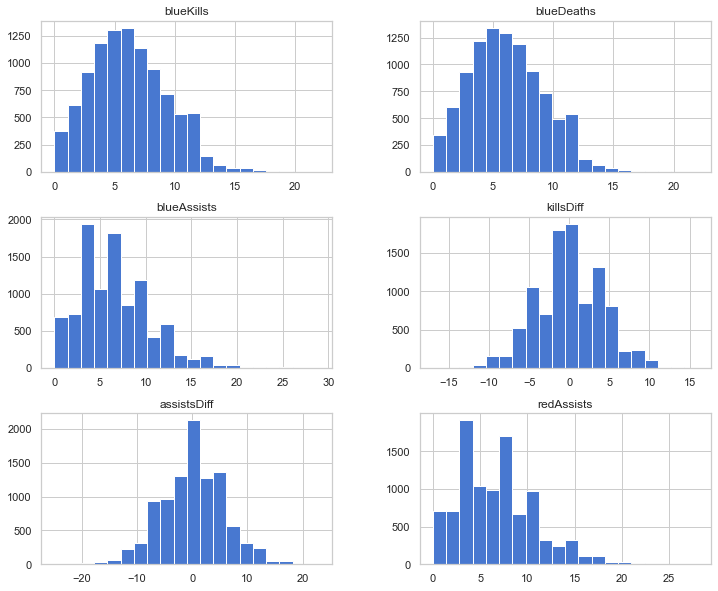

In [22]:
x['killsDiff'] = x['blueKills'] - x['blueDeaths']
x['assistsDiff'] = x['blueAssists'] - x['redAssists']

x[['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists']].hist(figsize=(12,10), bins=20)
plt.show()

/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/liamisaacs/opt/anaconda3/lib/pyth

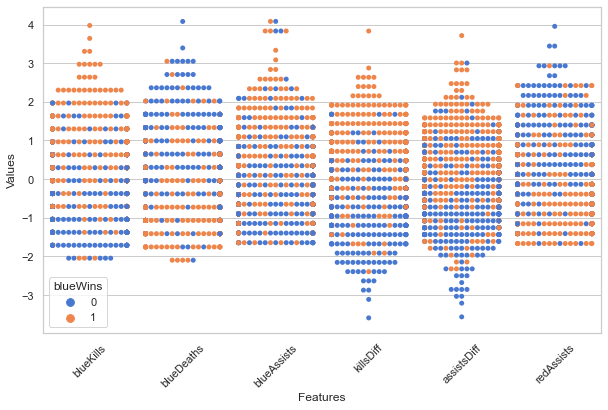

In [23]:
sns.set(style='whitegrid', palette='muted')

data = x[['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10,6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

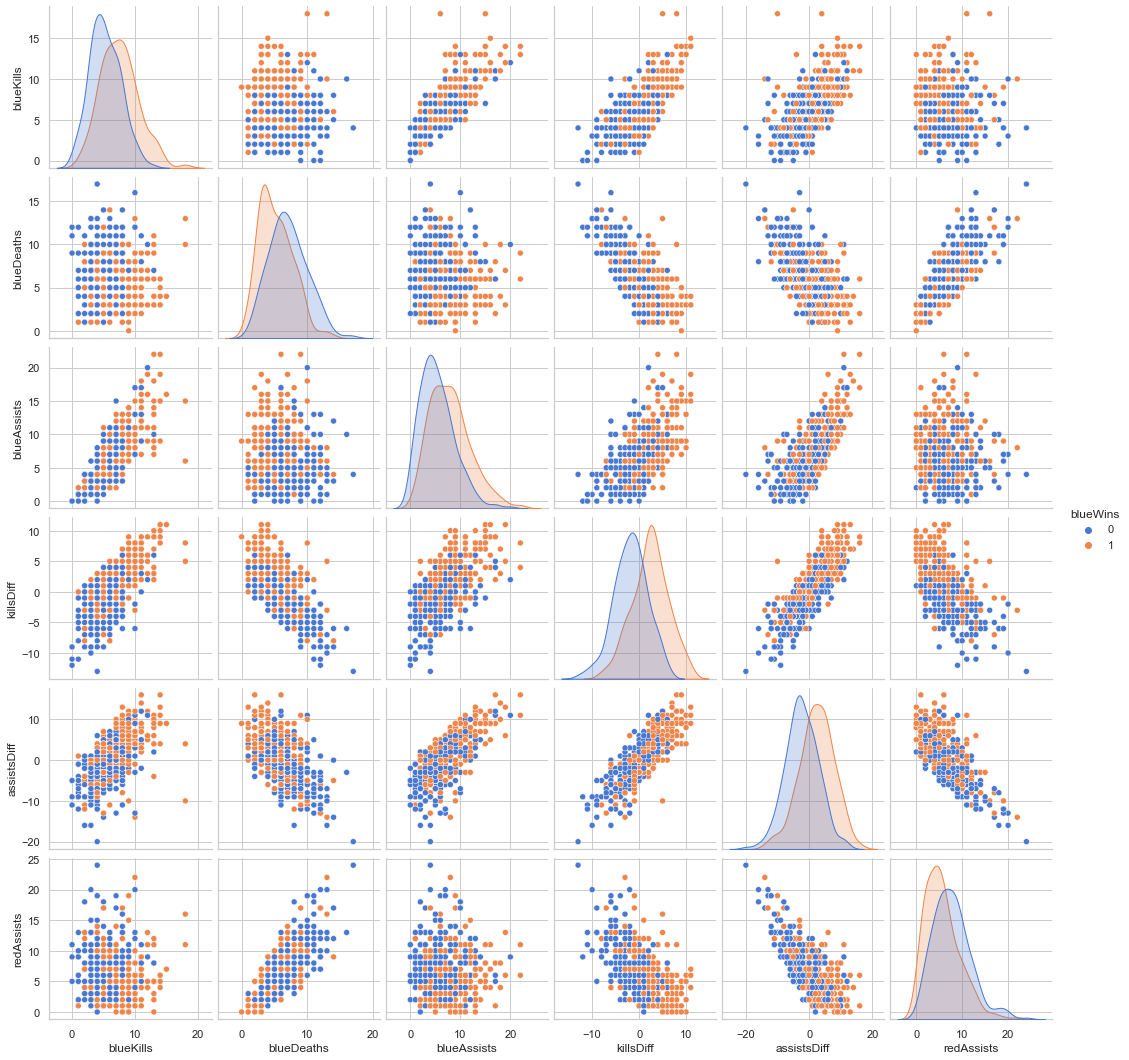

In [24]:
data = pd.concat([y, x], axis=1).sample(500)

sns.pairplot(data, vars=['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists'], 
             hue='blueWins')

plt.show()

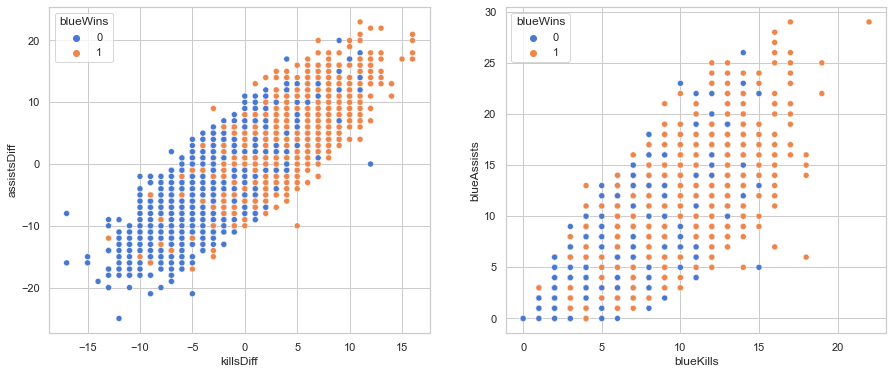

In [25]:
data = pd.concat([y, x], axis=1)

fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.scatterplot(x='killsDiff', y='assistsDiff', hue='blueWins', data=data, ax=ax[0])

sns.scatterplot(x='blueKills', y='blueAssists', hue='blueWins', data=data, ax=ax[1])
plt.show()

In [26]:
# Drop unnecessary features
drop_cols = ['blueFirstBlood','blueKills','blueDeaths','blueAssists','redAssists']
x.drop(drop_cols, axis=1, inplace=True)

eliteDiff
-2    0.286301
-1    0.368772
 0    0.500683
 1    0.632093
 2    0.735211
Name: blueWins, dtype: float64
dragonsDiff
-1    0.374173
 0    0.500000
 1    0.640940
Name: blueWins, dtype: float64
heraldsDiff
-1    0.387729
 0    0.498680
 1    0.595046
Name: blueWins, dtype: float64


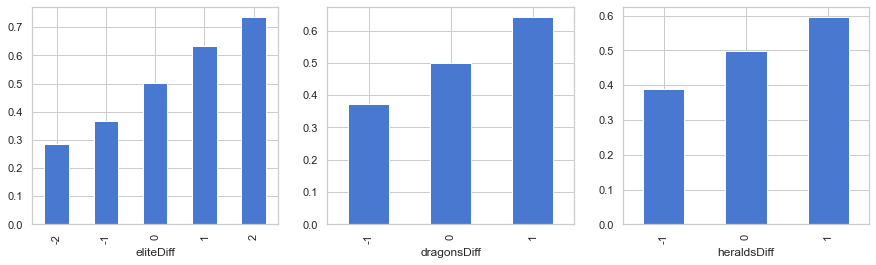

In [27]:
x['dragonsDiff'] = x['blueDragons'] - x['redDragons']
x['heraldsDiff'] = x['blueHeralds'] - x['redHeralds']
x['eliteDiff'] = x['blueEliteMonsters'] - x['redEliteMonsters']

data = pd.concat([y, x], axis=1)

eliteGroup = data.groupby(['eliteDiff'])['blueWins'].mean()
dragonGroup = data.groupby(['dragonsDiff'])['blueWins'].mean()
heraldGroup = data.groupby(['heraldsDiff'])['blueWins'].mean()

fig, ax = plt.subplots(1,3, figsize=(15,4))

eliteGroup.plot(kind='bar', ax=ax[0])
dragonGroup.plot(kind='bar', ax=ax[1])
heraldGroup.plot(kind='bar', ax=ax[2])

print(eliteGroup)
print(dragonGroup)
print(heraldGroup)

plt.show()

In [28]:
drop_cols = ['blueEliteMonsters','blueDragons','blueHeralds',
            'redEliteMonsters','redDragons','redHeralds']
x.drop(drop_cols, axis=1, inplace=True)

towerDiff
-2      27
-1     347
 0    9064
 1     406
 2      28
 3       6
 4       1
Name: blueWins, dtype: int64
towerDiff
-2    0.185185
-1    0.216138
 0    0.498124
 1    0.741379
 2    0.964286
 3    1.000000
 4    1.000000
Name: blueWins, dtype: float64


Text(0, 0.5, 'Count')

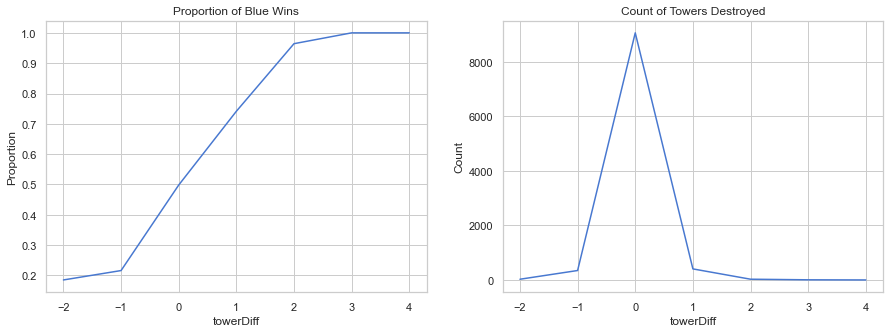

In [29]:
x['towerDiff'] = x['blueTowersDestroyed'] - x['redTowersDestroyed']

data = pd.concat([y, x], axis=1)

towerGroup = data.groupby(['towerDiff'])['blueWins']
print(towerGroup.count())
print(towerGroup.mean())

fig, ax = plt.subplots(1,2,figsize=(15,5))

towerGroup.mean().plot(kind='line', ax=ax[0])
ax[0].set_title('Proportion of Blue Wins')
ax[0].set_ylabel('Proportion')

towerGroup.count().plot(kind='line', ax=ax[1])
ax[1].set_title('Count of Towers Destroyed')
ax[1].set_ylabel('Count')

In [30]:
drop_cols = ['blueTowersDestroyed','redTowersDestroyed']
x.drop(drop_cols, axis=1, inplace=True)

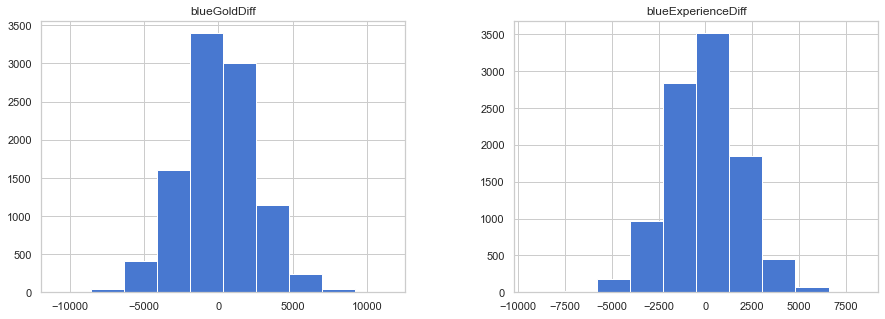

In [31]:
data = pd.concat([y, x], axis=1)

data[['blueGoldDiff','blueExperienceDiff']].hist(figsize=(15,5))
plt.show()

<AxesSubplot:xlabel='blueExperienceDiff', ylabel='blueGoldDiff'>

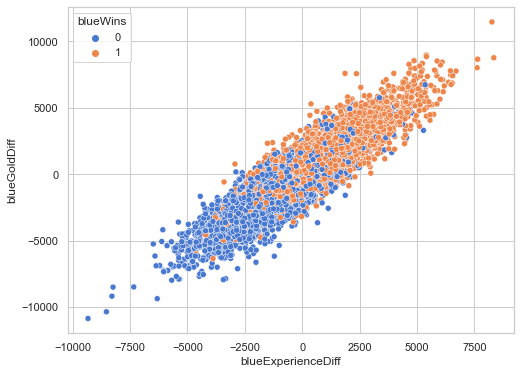

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='blueExperienceDiff', y='blueGoldDiff', hue='blueWins', data=data)

In [33]:
drop_cols = ['blueTotalGold','blueTotalExperience','redTotalGold','redTotalExperience']
x.drop(drop_cols, axis=1, inplace=True)

x.rename(columns={'blueGoldDiff':'goldDiff', 'blueExperienceDiff':'expDiff'}, inplace=True)

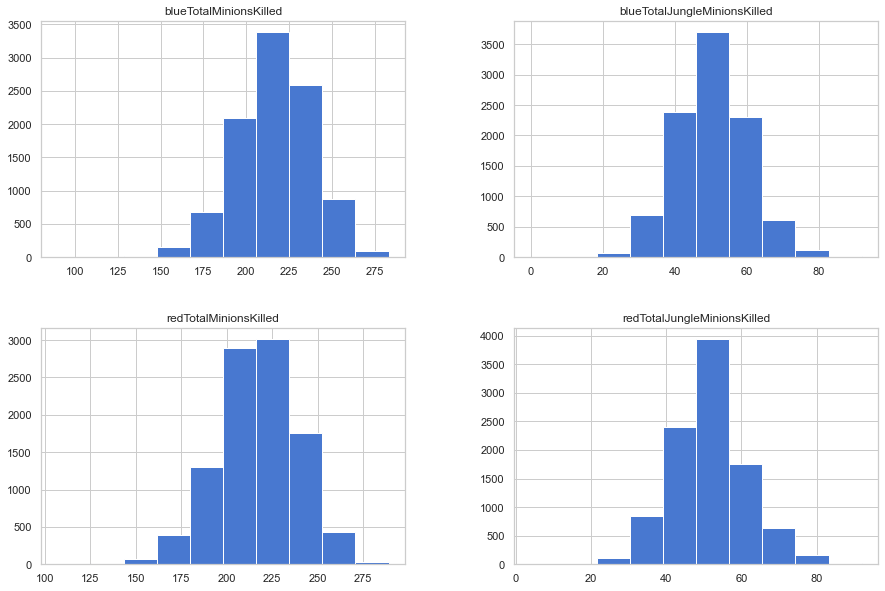

In [34]:
data = pd.concat([y, x], axis=1)

data[['blueTotalMinionsKilled','blueTotalJungleMinionsKilled',
      'redTotalMinionsKilled','redTotalJungleMinionsKilled']].hist(figsize=(15,10))
plt.show()

/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


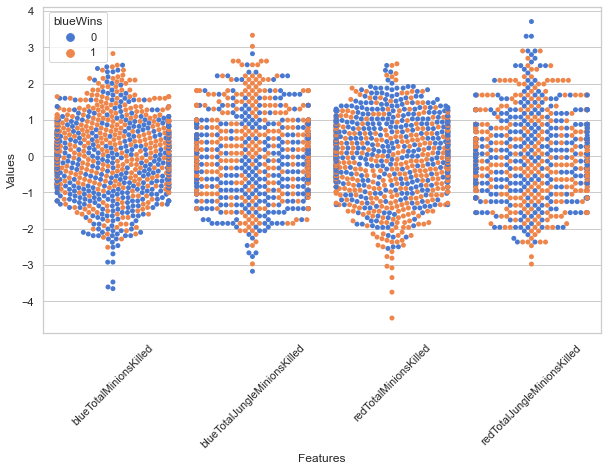

In [35]:
sns.set(style='whitegrid', palette='muted')

data = x[['blueTotalMinionsKilled','blueTotalJungleMinionsKilled',
      'redTotalMinionsKilled','redTotalJungleMinionsKilled']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10,6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

In [36]:
drop_cols = ['blueTotalMinionsKilled','blueTotalJungleMinionsKilled',
      'redTotalMinionsKilled','redTotalJungleMinionsKilled']
x.drop(drop_cols, axis=1, inplace=True)

In [37]:
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [38]:
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7903, 8) (7903,)
Test set: (1976, 8) (1976,)


In [40]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Algorithm', 'Accuracy', 'Recall', 'Precision', 'F-Score']

In [41]:
def get_confusion_matrix(algorithm, y_pred, y_actual):
    # Create confusion matrix and interpret values
    con = confusion_matrix(y_test, y_pred)
    tp, fn, fp, tn = con[0][0], con[0][1], con[1][0], con[1][1]
    algorithm = algorithm
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f_score = (2 * precision * recall) / (recall + precision)
    return algorithm, accuracy, recall, precision, f_score

In [42]:
Ks = 10
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    kneigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred = kneigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)

# Use most accurate k value to predict test values
k = mean_acc.argmax()+1
neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
y_pred = neigh.predict(X_test)

In [43]:
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('KNN', y_pred, y_test)

# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

In [44]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,y_train)
y_pred = drugTree.predict(X_test)

In [45]:
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('Decision', y_pred, y_test)

# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

In [46]:
LR = LogisticRegression(C=0.01, solver='liblinear')
y_pred = LR.fit(X_train,y_train).predict(X_test)

In [47]:
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('LR', y_pred, y_test)

# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

In [48]:
clf = svm.SVC(kernel='rbf')
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [49]:
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('SVM', y_pred, y_test)

# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

In [50]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [51]:
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('Bayes', y_pred, y_test)

# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

In [52]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [53]:
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('R Forest', y_pred, y_test)

# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

In [54]:
print(table)


+-----------+----------+---------+-----------+---------+
| Algorithm | Accuracy |  Recall | Precision | F-Score |
+-----------+----------+---------+-----------+---------+
|    KNN    | 0.70698  | 0.72561 |  0.69795  | 0.71151 |
|  Decision | 0.73077  | 0.77033 |  0.71241  | 0.74023 |
|     LR    | 0.74646  |  0.7439 |  0.74618  | 0.74504 |
|    SVM    | 0.73988  | 0.74695 |   0.735   | 0.74093 |
|   Bayes   | 0.73229  | 0.73171 |  0.73096  | 0.73134 |
|  R Forest | 0.73785  | 0.74492 |   0.733   | 0.73891 |
+-----------+----------+---------+-----------+---------+
